In [1]:
!pip install qiskit qiskit[visualization] qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.0 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=719197ad43197dbef898f71c68730af1a99223d2adffa405fd6c6cf4853d444c
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [4]:
from qiskit.providers.fake_provider import GenericBackendV2

In [17]:
lista = ['a','1','juanito','miguel']

In [18]:
lista.append('maria')

In [19]:
lista

['a', '1', 'juanito', 'miguel', 'maria']

In [20]:
lista = []
for ii in range(20):
  lista.append(ii)

In [21]:
lista

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [22]:
lista = []
for ii in range(20):
  li = []
  for jj in range(ii):
    li.append(jj)
  lista.append(li)

In [23]:
lista

[[],
 [0],
 [0, 1],
 [0, 1, 2],
 [0, 1, 2, 3],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4, 5],
 [0, 1, 2, 3, 4, 5, 6],
 [0, 1, 2, 3, 4, 5, 6, 7],
 [0, 1, 2, 3, 4, 5, 6, 7, 8],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]]

In [24]:
from qiskit.circuit.library import HamiltonianGate

In [66]:
Jx = np.array([[0, 1], [1, 0]])
Jy = np.array([[0, -1.0j], [1.0j, 0]])

omega_x = 2.3
omega_y = 3.1
Delta_t = 0.02

In [67]:
ga_U1 = HamiltonianGate(Jx, time=omega_x * Delta_t, label='$J_x$').control(1)
ga_U2 = HamiltonianGate(Jy, time=omega_y * Delta_t, label='$J_y$').control(1)

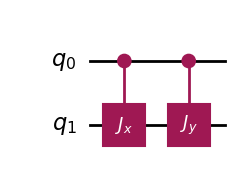

In [68]:
qc = QuantumCircuit(2)
qc.append(ga_U1, [0, 1])
qc.append(ga_U2, [0, 1])
qc.draw('mpl')

In [69]:
ga_UDelta_t = qc.to_gate(label='$U(\Delta t)$')

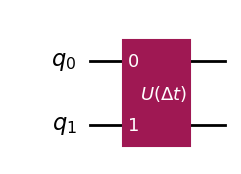

In [70]:
qc_a = QuantumCircuit(2)
qc_a.append(ga_UDelta_t, [0, 1])
qc_a.draw('mpl')

In [71]:
nc = 100
qc_list = []
for ii in range(nc):
  qc_sim = QuantumCircuit(2, 2)
  qc_sim.h(0)
  qc_sim.barrier()
  qc_sim.cx(0,1)
  for jj in range(ii):
    qc_sim.append(ga_UDelta_t, [0, 1])
  qc_sim.barrier()
  qc_sim.x(0)
  qc_sim.ch(0, 1)
  qc_sim.x(0)
  qc_sim.h(0)
  qc_sim.barrier()
  qc_sim.measure([0,1], [0,1])
  qc_list.append(qc_sim)


In [72]:
len(qc_list)

100

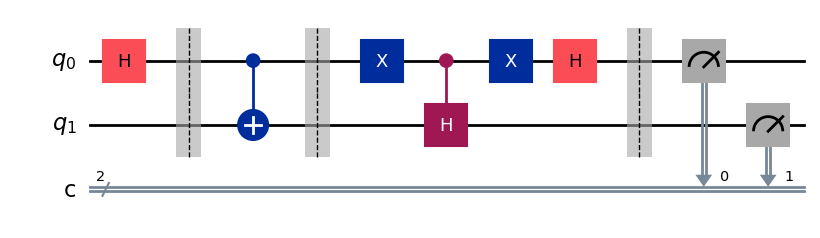

In [73]:
qc_list[0].draw('mpl')

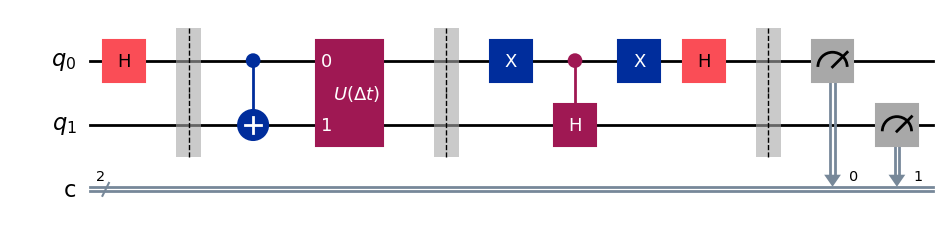

In [74]:
qc_list[1].draw('mpl')

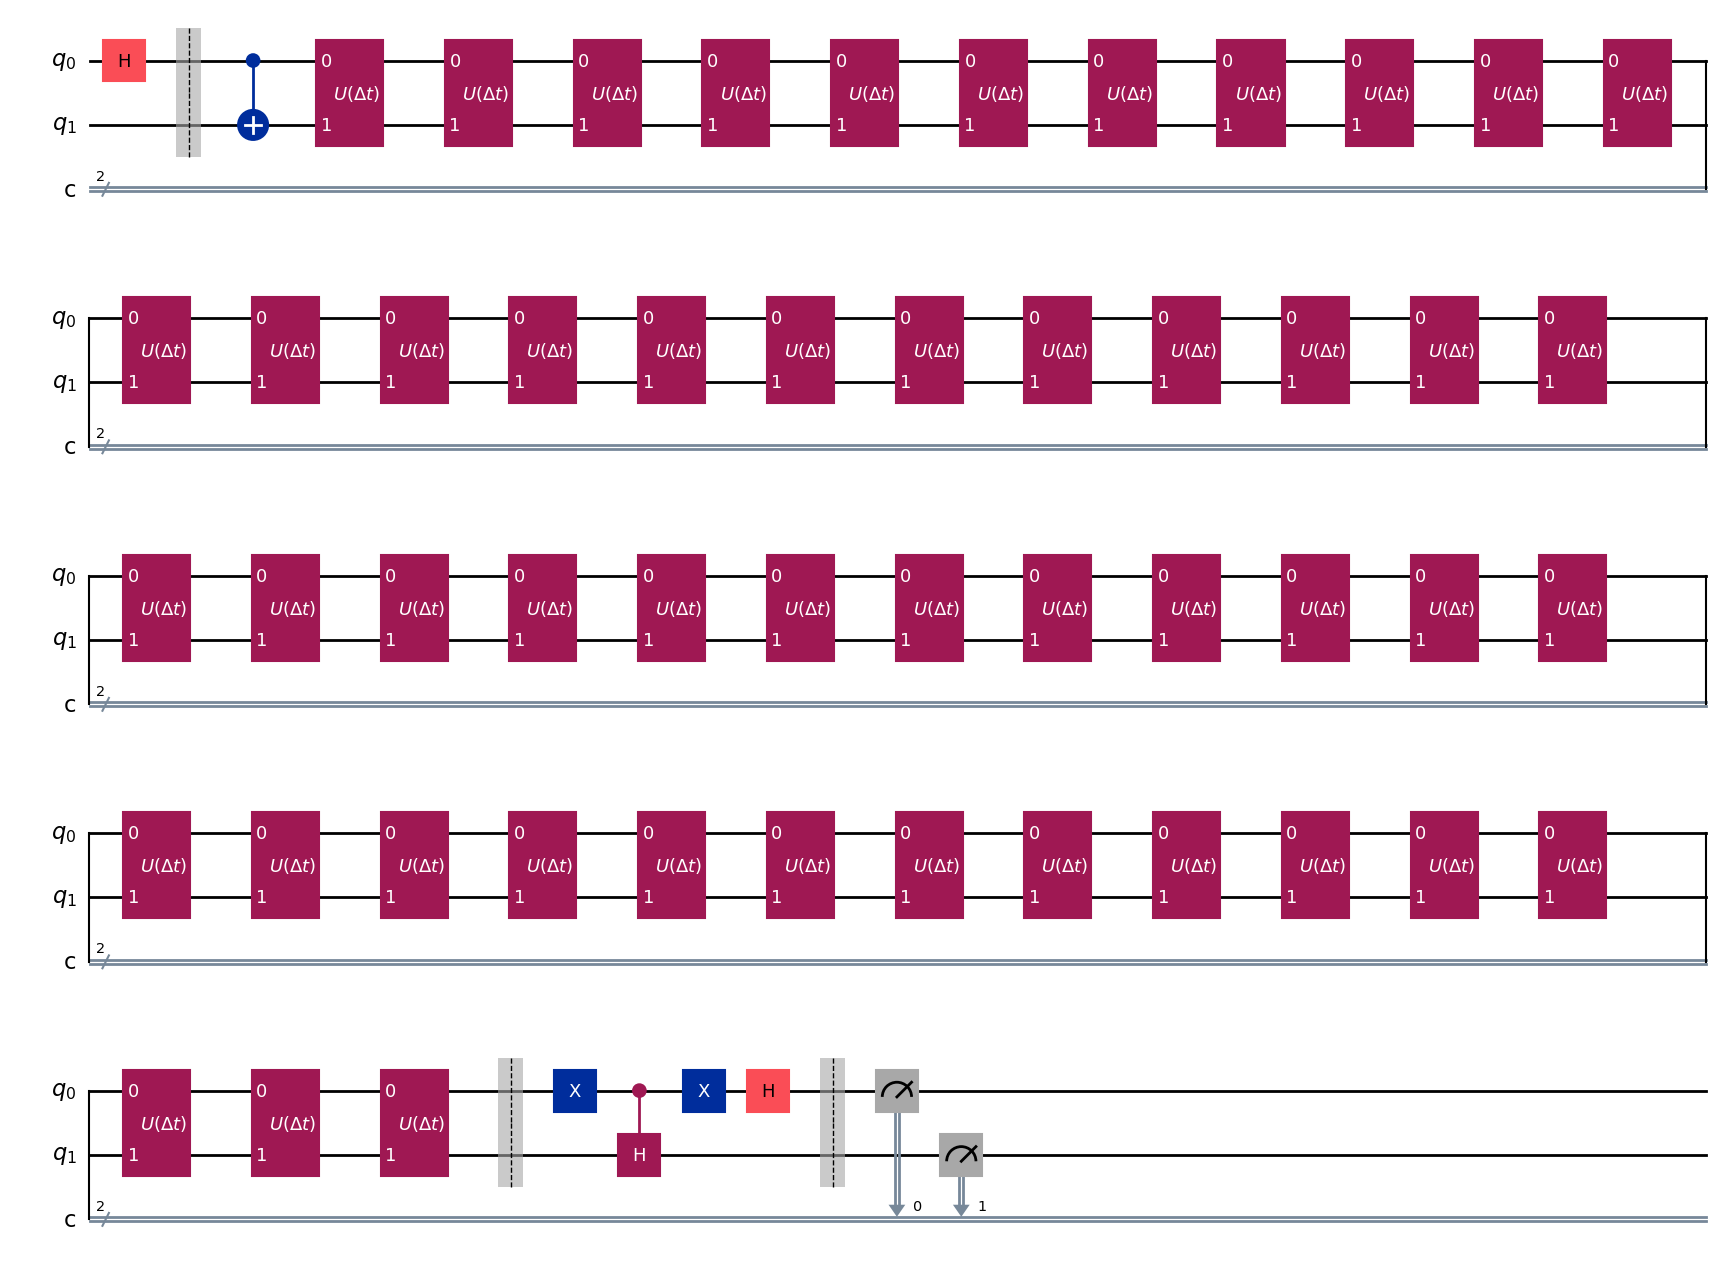

In [75]:
qc_list[50].draw('mpl')

In [76]:
qc_list[0].depth()

7

In [77]:
qc_list[50].depth()

57

In [78]:
qc_list[51].depth()

58

In [79]:
backend = GenericBackendV2(2)
qc_tran = transpile(qc_list, backend=backend)

In [80]:
len(qc_tran)

100

In [81]:
shots = 16 * 1024
job = backend.run(qc_tran, shots=shots)
print(job.job_id())

245b2a3e-3992-49de-9812-ca02c3a7babe


In [82]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [83]:
counts = job.result().get_counts()

In [84]:
counts[0:5]

[{'11': 456, '01': 2045, '00': 2072, '10': 11811},
 {'01': 2505, '11': 458, '00': 1869, '10': 11552},
 {'11': 447, '00': 1525, '10': 11544, '01': 2868},
 {'01': 3364, '11': 422, '00': 1298, '10': 11300},
 {'11': 369, '01': 3759, '10': 11100, '00': 1156}]

In [85]:
for count in counts[0:5]:
  p00 = count['00']/shots
  p01 = count['01']/shots
  p10 = count['10']/shots
  p11 = count['11']/shots
  print(p00, p01, p10, p11)


0.12646484375 0.12481689453125 0.72088623046875 0.02783203125
0.11407470703125 0.15289306640625 0.705078125 0.0279541015625
0.09307861328125 0.175048828125 0.70458984375 0.02728271484375
0.0792236328125 0.205322265625 0.689697265625 0.0257568359375
0.070556640625 0.22943115234375 0.677490234375 0.02252197265625


In [86]:
for count in counts[0:5]:
  p00 = count['00']/shots
  p01 = count['01']/shots
  p10 = count['10']/shots
  p11 = count['11']/shots
  alpha1=np.sqrt(2*(p00+p01-1/4))
  cphi1=np.sqrt(2)*(p00-p01)/alpha1
  alpha2=np.sqrt(2*(p10+p11-1/4))
  cphi2=np.sqrt(2)*(p10-p11)/alpha2
  print(alpha1,alpha2,cphi1, cphi2)

0.05063078670631141 0.9987174392376955 0.046030336221654644 0.9813853343172776
0.18421603316486868 0.9828857782697845 -0.2980058215023334 0.9742718823744203
0.19040715010865533 0.9817052089031106 -0.6088184686158912 0.9757072886079966
0.2628531850196988 0.9648358425789332 -0.6784410723681283 0.9731744187302693
0.31618916163825095 0.9486961653039924 -0.7105951640591547 0.9763557949554719


In [119]:
t_list = []
alpha1_list = []
alpha2_list = []
cphi1_list = []
cphi2_list = []
sphi1_list = []
sphi2_list = []
t = 0.0
for count in counts:
  p00 = count['00']/shots
  p01 = count['01']/shots
  p10 = count['10']/shots
  p11 = count['11']/shots
  alpha1=np.sqrt(2*(p00+p01-1/4))
  cphi1=np.sqrt(2)*(p00-p01)/alpha1
  alpha2=np.sqrt(2*(p10+p11-1/4))
  cphi2=np.sqrt(2)*(p10-p11)/alpha2
  sphi1 = np.sqrt(1-cphi1**2)
  sphi2 = np.sqrt(1-cphi2**2)
  t_list.append(t)
  t += Delta_t
  alpha1_list.append(alpha1)
  alpha2_list.append(alpha2)
  cphi1_list.append(cphi1)
  cphi2_list.append(cphi2)
  sphi1_list.append(sphi1)
  sphi2_list.append(sphi2)


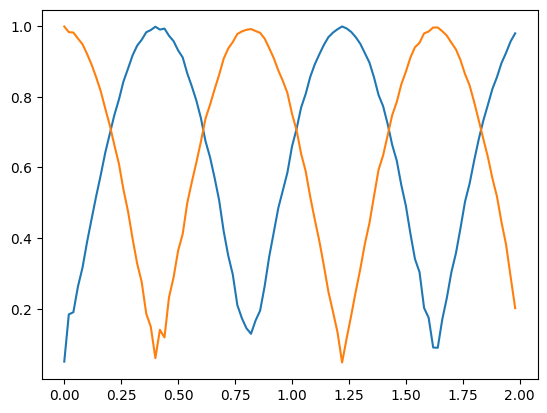

In [88]:
plt.plot(t_list, alpha1_list, label='$\alpha_1$')
plt.plot(t_list, alpha2_list, label='$\alpha_2$')
plt.show()

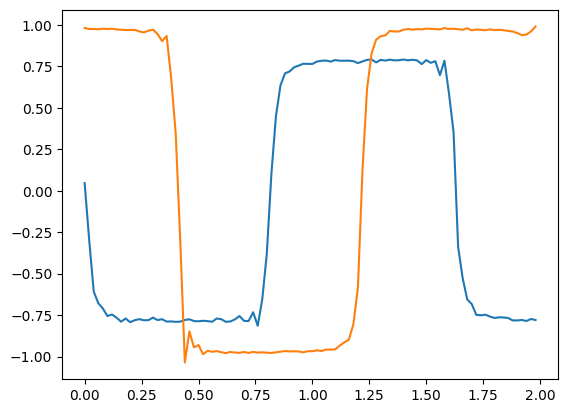

In [89]:
plt.plot(t_list, cphi1_list, label='$\cos\phi_1$')
plt.plot(t_list, cphi2_list, label='$\cos\phi_2$')
plt.show()

$\left\vert \psi(t) \right\rangle = U(t)\left\vert \psi(0) \right\rangle $

$U(t) = \exp(-i H t/\hbar)$

$\left\vert \psi(0) \right\rangle = \left\vert 1 \right\rangle$

In [91]:
from scipy.linalg import expm

In [123]:
psi0 = np.array([0, 1])
t_list_clas = []
alpha1_list_clas = []
alpha2_list_clas = []
cphi1_list_clas = []
cphi2_list_clas = []
sphi1_list_clas = []
sphi2_list_clas = []
for ii in range(nc):
  t = ii * Delta_t
  t_list_clas.append(t)
  U = expm(-1j * (omega_x * Jx + omega_y * Jy)* t)
  psi = np.matmul(U, psi0)
  alpha1 = np.abs(psi[0])
  alpha2 = np.abs(psi[1])
  cphi1 = np.cos(np.angle(psi[0]))
  cphi2 = np.cos(np.angle(psi[1]))
  sphi1 = np.sin(np.angle(psi[0]))
  sphi2 = np.sin(np.angle(psi[1]))
  alpha1_list_clas.append(alpha1)
  alpha2_list_clas.append(alpha2)
  cphi1_list_clas.append(cphi1)
  cphi2_list_clas.append(cphi2)
  sphi1_list_clas.append(sphi1)
  sphi2_list_clas.append(sphi2)

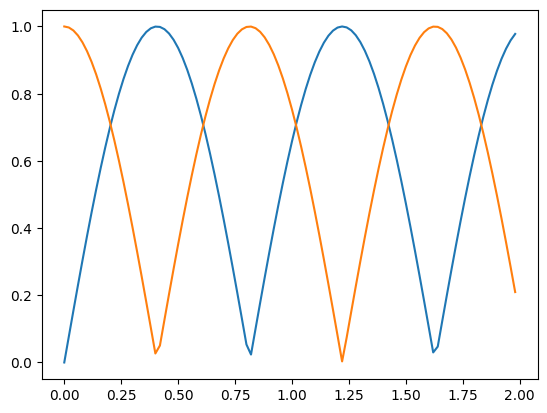

In [96]:
plt.plot(t_list_clas, alpha1_list_clas, label='$\alpha_1$')
plt.plot(t_list_clas, alpha2_list_clas, label='$\alpha_2$')
plt.show()

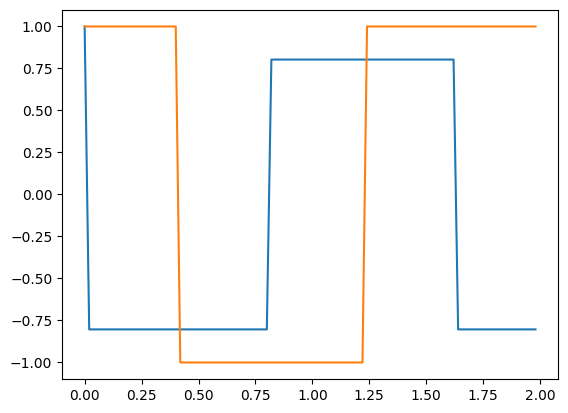

In [97]:
plt.plot(t_list_clas, cphi1_list_clas, label='$\cos\phi_1$')
plt.plot(t_list_clas, cphi2_list_clas, label='$\cos\phi_2$')
plt.show()

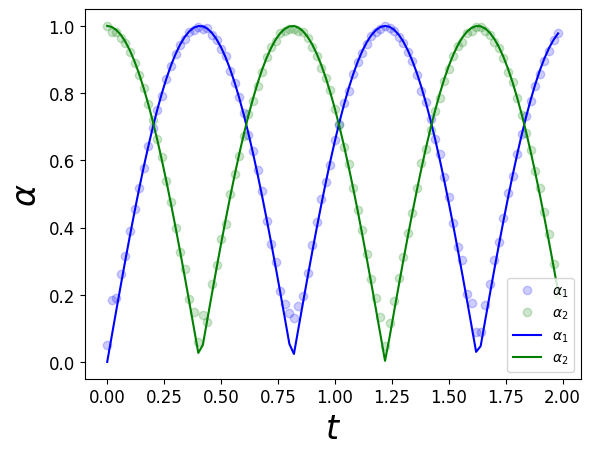

In [114]:
plt.plot(t_list, alpha1_list, 'o', alpha=0.2, c='blue' ,label='$\\alpha_1$')
plt.plot(t_list, alpha2_list, 'o', alpha=0.2, c='green' ,label='$\\alpha_2$')
plt.plot(t_list, alpha1_list_clas, c='blue' ,label='$\\alpha_1$')
plt.plot(t_list, alpha2_list_clas, c='green' ,label='$\\alpha_2$')
plt.xlabel('$t$', fontsize=24)
plt.ylabel('$\\alpha$', fontsize=24)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()


plt.show()

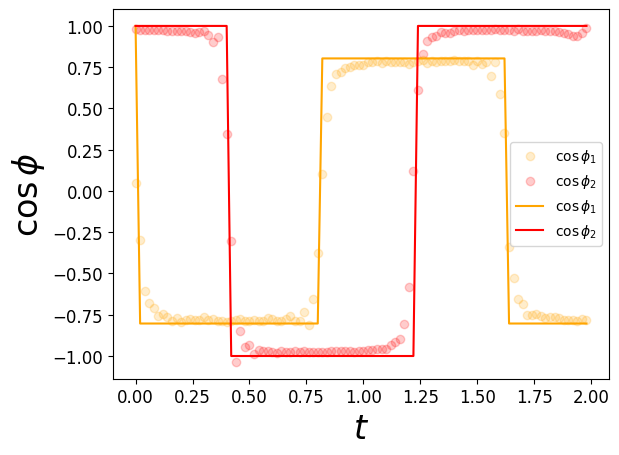

In [117]:
plt.plot(t_list, cphi1_list, 'o', alpha=0.2, c='orange' ,label='$\\cos\\phi_1$')
plt.plot(t_list, cphi2_list, 'o', alpha=0.2, c='red' ,label='$\\cos\\phi_2$')
plt.plot(t_list, cphi1_list_clas, c='orange' ,label='$\\cos\\phi_1$')
plt.plot(t_list, cphi2_list_clas, c='red' ,label='$\\cos\\phi_2$')
plt.xlabel('$t$', fontsize=24)
plt.ylabel('$\\cos\phi$', fontsize=24)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()


plt.show()

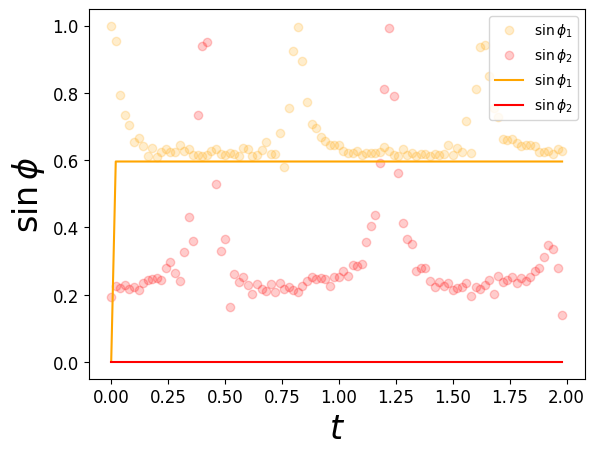

In [122]:
plt.plot(t_list, sphi1_list, 'o', alpha=0.2, c='orange' ,label='$\\sin\\phi_1$')
plt.plot(t_list, sphi2_list, 'o', alpha=0.2, c='red' ,label='$\\sin\\phi_2$')
plt.plot(t_list, sphi1_list_clas, c='orange' ,label='$\\sin\\phi_1$')
plt.plot(t_list, sphi2_list_clas, c='red' ,label='$\\sin\\phi_2$')
plt.xlabel('$t$', fontsize=24)
plt.ylabel('$\\sin\phi$', fontsize=24)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()


plt.show()